In [1]:
# generate the final charts

In [2]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.display.max_colwidth = 500

In [3]:
%%time
##read in our vectorized data
X = pd.read_csv('./proc_17_108_uniques_clustered_full.csv')

CPU times: user 21.5 s, sys: 1.06 s, total: 22.6 s
Wall time: 22.8 s


In [4]:
# some useful groups

In [5]:
X_unique = X[X['dupe_count'] == 1]
X_dupe = X[X['dupe_count'] > 1]
X_dupe_and_campaign = X[(X['dupe_count'] > 1) & ((X['level_0'] > -1) | (X['level_1'] > -1))]
X_dupe_or_campaign = X[(X['dupe_count'] > 1) | ((X['level_0'] > -1) | (X['level_1'] > -1))]
X_not_dupe_or_campaign = X[~((X['dupe_count'] > 1) | ((X['level_0'] > -1) | (X['level_1'] > -1)))]
X_true_unique = X[(X['dupe_count'] == 1) & ((X['level_0'] == -1) & (X['level_1'] == -1))]
X_campaign = X[(X['level_0'] > -1) | (X['level_1'] > -1)]
X_not_campaign = X[~((X['level_0'] > -1) | (X['level_1'] > -1))]

In [6]:
### some sanity checks

In [7]:
X_dupe_and_campaign['dupe_count'].sum()
X_campaign['dupe_count'].sum() - X_dupe_and_campaign['dupe_count'].sum()
X_dupe['dupe_count'].sum() - X_dupe_and_campaign['dupe_count'].sum()
X['dupe_count'].sum() - X_dupe_or_campaign['dupe_count'].sum()

787852.0

In [8]:
X_true_unique['dupe_count'].sum()

787852.0

In [9]:
X_not_dupe_or_campaign['dupe_count'].sum()

787852.0

In [10]:
X_campaign_grouped = X_campaign.groupby(by=['level_0','level_1'], as_index=False)[['text_data','dupe_count']].agg(
    {"text_data": lambda x: x.iloc[0], "docid": lambda x: x.iloc[0], 'dupe_count': 'sum'}
)
X_grouped = pd.concat([X_campaign_grouped, X_not_campaign], axis=0)

/home/jeff/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [11]:
# go through level_1 clusters and make sure they look right

In [12]:
X[X['level_1'] == 77]

,level_0,level_1,text_data,docid,dupe_count
2094152,-1,77,I support strong net neutrality backed by Title II oversight of ISPs. Thank you.,459686,40.0
2095962,-1,77,I support strong net neutrality backed by title 2 oversight of ISPs.\nThank you.,4448084,4.0
2098661,-1,77,I support strong net neutrality backed by Title II oversight of ISP. Thank you.,489024,1.0
2101052,-1,77,I support strong net neutrality. Backed by title two oversight of ISPs. Thank you.,22095888,1.0
2105950,-1,77,Ajit Pai\nI specifically support strong Net Neutrality backed by title 2 oversite of ISP's.\nThank you,342599,1.0
2106064,-1,77,I strongly support net neutrality backed by Title ll oversight of ISPs. Thank you.,482797,1.0
2106901,-1,77,i support strong net neutrality rules backed by title II oversight of ISPs. thank you.,400707,1.0
2107426,-1,77,"I vehemently support strong Net Neutrality, backed by Title II oversight of ISPs. Thank you.",2162701,1.0
2107491,-1,77,I highly support strong net neutrality backed by Title II oversight of ISPs. Thank you.,2152703,1.0
2107800,-1,77,I support strong net neutrality backed by Title II oversight of ISPs. Thank you.,319078,10.0


In [13]:
graph_df = X_grouped.sort_values('dupe_count')
graph_df.iloc[-30:,:] # use this to read through comment clusters

,level_0,level_1,text_data,docid,dupe_count
2827552,-1,-1,"Save net neutrality! I am worried that the protections that are in place will be weakened if we change the way they are enforced. I do not support losing any protections, and I do not trust big companies to look out for my best interests. That's YOUR JOB!",5937585,108861.0
2728290,-1,-1,Please Save Net Neutrality and Title ll rules. As a freelance translator I rely on internet spped to do my work and corporations would interfere with my searches if given the change. Do the right thing and keep the needed regulations. Thank you.,5321492,108960.0
2549416,-1,-1,"We should not leave the ability for small companies to compete with large online businesses up to the whims of our internet providers. It is out responsibility to defend our right to free market competition. IF THENEWSEARCHENGINE is better than Google, Google's wealth should not strike down the new engine if our internet providers choose not to be benevolent. Save net neutrality.",3165762,109122.0
2313267,-1,-1,make sure net neutrality does not dissapear. It is the only thing saving the internet at this moment. If it is removed many webservices will be at risk.,4299347,109160.0
2577166,-1,-1,Dear Ladies and Gentlemen. Net neutrality is a serious topic. Please do not implement weakend regulations. TO keep it short and save my breath: All possible negative scenarios were discussed in the past. More than that: some of them were getting reality and thus the discussion started back in 2010/ So please keep it as it is and do something useful.,5916557,109419.0
2155459,-1,-1,Please save the internet from the corporations. Tom Wheeler was right. Let the new neutrality stand.,5303734,109425.0
2942086,-1,-1,"As a concerned taxpayer and consumer, I am writing to urge the FCC to set the internet free and remove the inappropriate, unnecessary and overly vast regulations currently holding back the full potential of the internet. Due to the grip of the utility-style regulations imposed under the previous Commission, taxpayers have been put at risk, the threat of new fees on consumer bills still looms large, investment in internet infrastructure has not realized its full potential, innovations have go...",21033427,122772.0
2681425,-1,-1,"Before leaving office, the Obama Administration rammed through a massive scheme that gave the federal government broad regulatory control over the internet. That misguided policy decision is threatening innovation and hurting broadband investment in one of the largest and most important sectors of the U.S. economy.\n \nI support the Federal Communications CommissionÍs decision to roll back Title II and allow for free market principles to guide our digital economy.",18738358,137549.0
127,2,-1,"As an Internet user, I'm asking the FCC to protect the net neutrality protections currently in place. \n\nThe FCC should throw out Chairman Ajit Pai's proposal to give the ISP monopolies like Comcast, AT&T, and Verizon the authority to create Internet fast lanes, stripping Internet users of the meaningful access and privacy protections we fought for and just recently won. \n\nI'm concerned about ISPs being allowed to discriminate against certain types of data or websites, because users will ...",1136434,166295.0
137,12,-1,"Cable and phone companies provide access to the internet. They're telecommunications carriers. They do not (and should not) have the right to censor or slow down my speech and my access to online content. When I use my broadband service, I decide who I communicate with and what information I transmit. I want the FCC to retain the ability to stop my internet service provider from interfering with my communications choices. The courts have already told the FCC that to do this, ISPs must remain...",8985247,169988.0


In [14]:
## with clustering

In [15]:
graph_df.loc[2483935,'text_data']

'The internet has been one of the greatest drivers of economic growth, job creation and innovation in our lifetimes. Unfortunately, the rules governing how the internet is regulated are largely being decided by whoever is the Chair of the FCC. I agree with the current FCC that the internet should not be regulated under a law created 80 years ago and that it creates uncertainty for internet users and the companies that invest billions of dollars into the internet economy. \n\nThe FCC’s move to get rid of the rules that unfairly and heavy-handedly enforced these principles is a necessary first step. But, now Congress needs to act so that open internet protections for consumers remain strong and consistent. I am writing today to encourage you to work with other members of Congress to pass bipartisan legislation that would codify the principles of transparency, no blocking, no censorship, and no discriminatory throttling and apply them to all internet companies. This is the best solution t

In [16]:
plt.style.use('bmh')
str_length = 23
graph_df['text_abbrev'] = X_grouped['text_data'].str[:str_length] + '...'
graph_df['repeal'] = False
#went through and manually labelled the top 300
repeal_indices = [139,2926461,24,2639190,2899252,35,2713771,2358517,2577835,2880191,2943098,2724204,2682511,2681425,2942086,
                 2757498, 2732803, 2792143, 2836091,
                 2714323, 2710881, 2790712, 2613548, 2587060, 2611167, 2884308, 2848587, 2851142, 2457853, 2946556, 2705024, 2765939, 2298869, 2533335, 2917048, 2874887,
                 2799976, 130, 2949926, 2599345, 2230162, 2445319,
                 2701858, 2882821, 23, 27, 2790584, 32,
                 2447528, 2491431, 2547231, 2483935, 2654239, 2782375, 2522295, 2882821, 2701858, 23,
                 2546864, 2556919, 2470983, 2352458, 2447528, 2491431, 2547231, 2483935,
                 2466661, 136
                 ]
for index in repeal_indices:
    graph_df.loc[index,'repeal'] = True

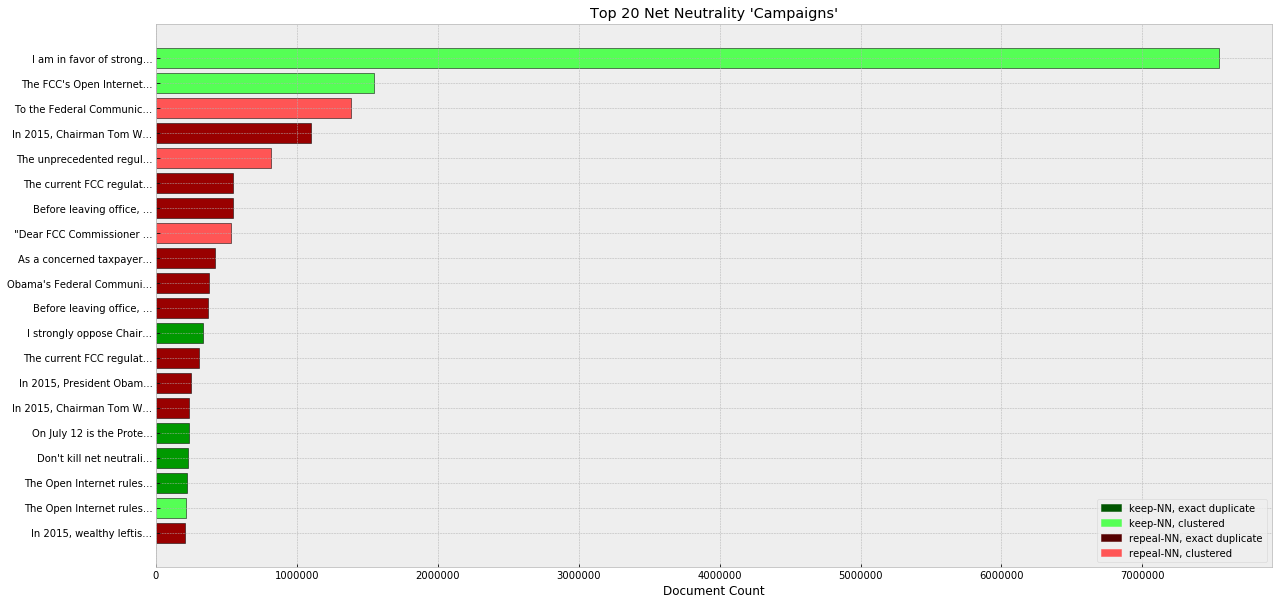

In [17]:
num_top = 20
num_string = '20'
plt.figure(1, figsize=(20, 10))
#graph_df_t = graph_df[~((X['level_0'] > -1) | (X['level_1'] > -1))]
graph_df_t = graph_df
graph_df_t = graph_df_t[-1*num_top:]

objects = graph_df_t['text_abbrev']
y_pos = np.arange(len(objects))
doc_count = graph_df_t['dupe_count']

colors = []

def row_to_color(row):
    if row['repeal'] and (row['level_0'] > -1 or row['level_1'] > -1): #manually clustered
        return '#FF5555'
    elif row['repeal'] and (row['level_0'] == -1 and row['level_1'] == -1): #dupe
        return '#990000'
    elif not row['repeal'] and (row['level_0'] > -1 or row['level_1'] > -1):  #manually clustered
        return '#55FF55'
    elif not row['repeal'] and (row['level_0'] == -1 and row['level_1'] == -1): #dupe
        return '#009900'
    else:
        return '#000000'

for index, row in graph_df_t.iterrows():
    colors.append(row_to_color(row))

plt.barh(y_pos, doc_count, align='center', alpha=1.0, color=colors, edgecolor='k')
#plt.xticks( np.arange(0, 8000000, 1000000) )
plt.yticks(y_pos, objects)
plt.xlabel('Document Count')
plt.title('Top {} Net Neutrality \'Campaigns\''.format(num_string))

# legend
patch1 = mpatches.Patch(color='#005500', label='keep-NN, exact duplicate')
patch2 = mpatches.Patch(color='#55FF55', label='keep-NN, clustered')
patch3 = mpatches.Patch(color='#550000', label='repeal-NN, exact duplicate')
patch4 = mpatches.Patch(color='#FF5555', label='repeal-NN, clustered')
plt.legend(handles=[patch1,patch2,patch3,patch4])

plt.savefig('top20campaigns.png', bbox_inches='tight')

plt.show()

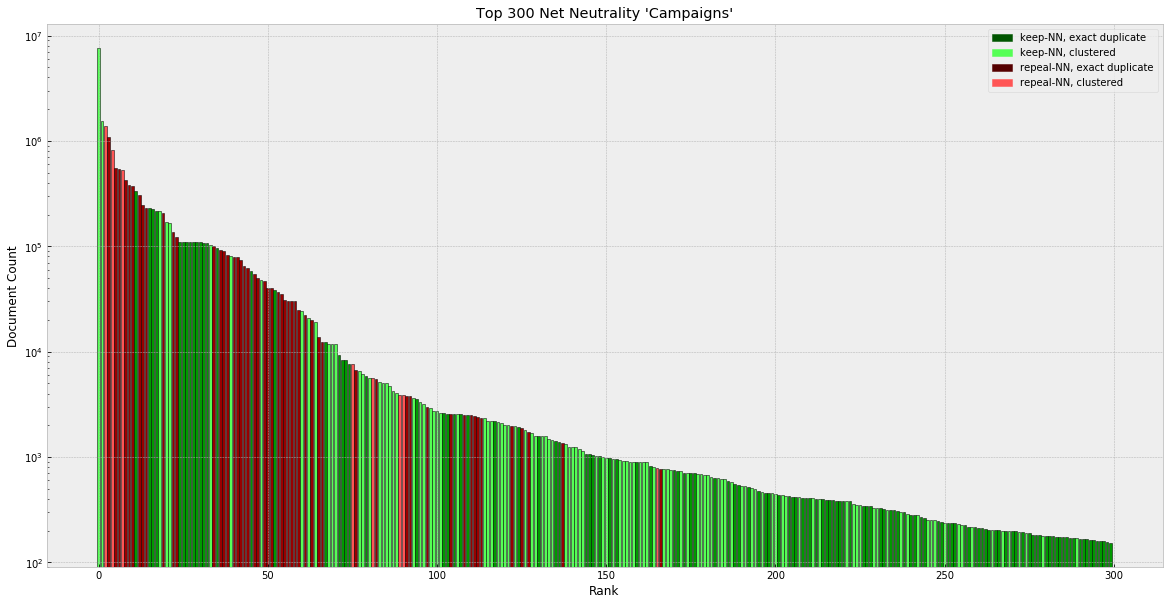

In [18]:
num_top = 300
num_string = '300'
plt.figure(1, figsize=(20, 10))
#graph_df_t = graph_df[~((X['level_0'] > -1) | (X['level_1'] > -1))]
graph_df_t = graph_df
graph_df_t = graph_df_t[-1*num_top:]
graph_df_t = graph_df_t.sort_values(['dupe_count'], ascending=False)

objects = graph_df_t['text_abbrev']
y_pos = np.arange(len(objects))
doc_count = graph_df_t['dupe_count']

colors = []

def row_to_color(row):
    if row['repeal'] and (row['level_0'] > -1 or row['level_1'] > -1): #manually clustered
        return '#FF5555'
    elif row['repeal'] and (row['level_0'] == -1 and row['level_1'] == -1): #dupe
        return '#990000'
    elif not row['repeal'] and (row['level_0'] > -1 or row['level_1'] > -1):  #manually clustered
        return '#55FF55'
    elif not row['repeal'] and (row['level_0'] == -1 and row['level_1'] == -1): #dupe
        return '#009900'
    else:
        return '#000000'

for index, row in graph_df_t.iterrows():
    colors.append(row_to_color(row))

plt.bar(y_pos, doc_count, align='center', alpha=1.0, color=colors, edgecolor='k')
#plt.xticks( np.arange(0, 8000000, 1000000) )
#plt.xticks(y_pos, y_pos)
plt.ylabel('Document Count')
plt.xlabel('Rank')
plt.yscale('log')
plt.title('Top {} Net Neutrality \'Campaigns\''.format(num_string))

# legend
patch1 = mpatches.Patch(color='#005500', label='keep-NN, exact duplicate')
patch2 = mpatches.Patch(color='#55FF55', label='keep-NN, clustered')
patch3 = mpatches.Patch(color='#550000', label='repeal-NN, exact duplicate')
patch4 = mpatches.Patch(color='#FF5555', label='repeal-NN, clustered')
plt.legend(handles=[patch1,patch2,patch3,patch4])

plt.savefig('topXcampaigns.png', bbox_inches='tight')

plt.show()